In [1]:
#import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install -U scikit-learn  #install the required library

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\anaconda3\envs\Ahmed\python.exe -m pip install --upgrade pip' command.


In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
#load the required dataset
df=pd.read_csv('clean_data.csv')
df.head() #explore dataframe

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743,745,1024,1018,US,343,...,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053,1053,1313,1318,US,613,...,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915,1915,2110,2133,US,617,...,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753,1755,1925,1933,US,300,...,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824,832,1015,1015,US,765,...,872,27,12,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
#remove columns which cannnot be encoded and included in the model
df.drop(['FlightNum', 'Cancelled', 'Diverted','UniqueCarrier','TailNum', 'Origin', 'Dest'],inplace=True,axis=1)

In [7]:
#setting a color paletet
cmap=sns.color_palette('YlGnBu')

In [8]:
#we choose ‘ArrDelay’ as our target variable as it had 0.93 correlation with ‘DepDelay’ therefore we choose ‘ArrDelay’ as our target variable to predict flight delay overall
# we now create a delay column following a binary classification approach
Delay=[]
#set criteria to identify class value
for i in df['ArrDelay']:
    if i > 0 :
        Delay.append(1)  # a delay greater than 0 mins
    if i <=0:
        Delay.append(0)  # a delay less than or equal to 0 mins , this refers to planes early or on time
df['Delay']=pd.Series(Delay)  
df # explore dataframe

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
0,2006,1,11,3,743,745,1024,1018,281,273,...,-2,1587,45,13,0,0,0,0,0,1
1,2006,1,11,3,1053,1053,1313,1318,260,265,...,0,1587,27,19,0,0,0,0,0,0
2,2006,1,11,3,1915,1915,2110,2133,235,258,...,0,1587,4,11,0,0,0,0,0,0
3,2006,1,11,3,1753,1755,1925,1933,152,158,...,-2,872,16,10,0,0,0,0,0,0
4,2006,1,11,3,824,832,1015,1015,171,163,...,-8,872,27,12,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558,1605,1749,1736,111,91,...,-7,403,14,17,0,0,0,0,0,1
14268924,2007,12,15,6,1902,1851,2110,2105,248,254,...,11,1589,6,21,0,0,0,0,0,1
14268925,2007,12,15,6,1024,1025,1750,1735,266,250,...,-1,1946,14,19,0,0,15,0,0,1
14268926,2007,12,15,6,1353,1315,1658,1622,125,127,...,38,732,11,14,0,0,0,0,36,1


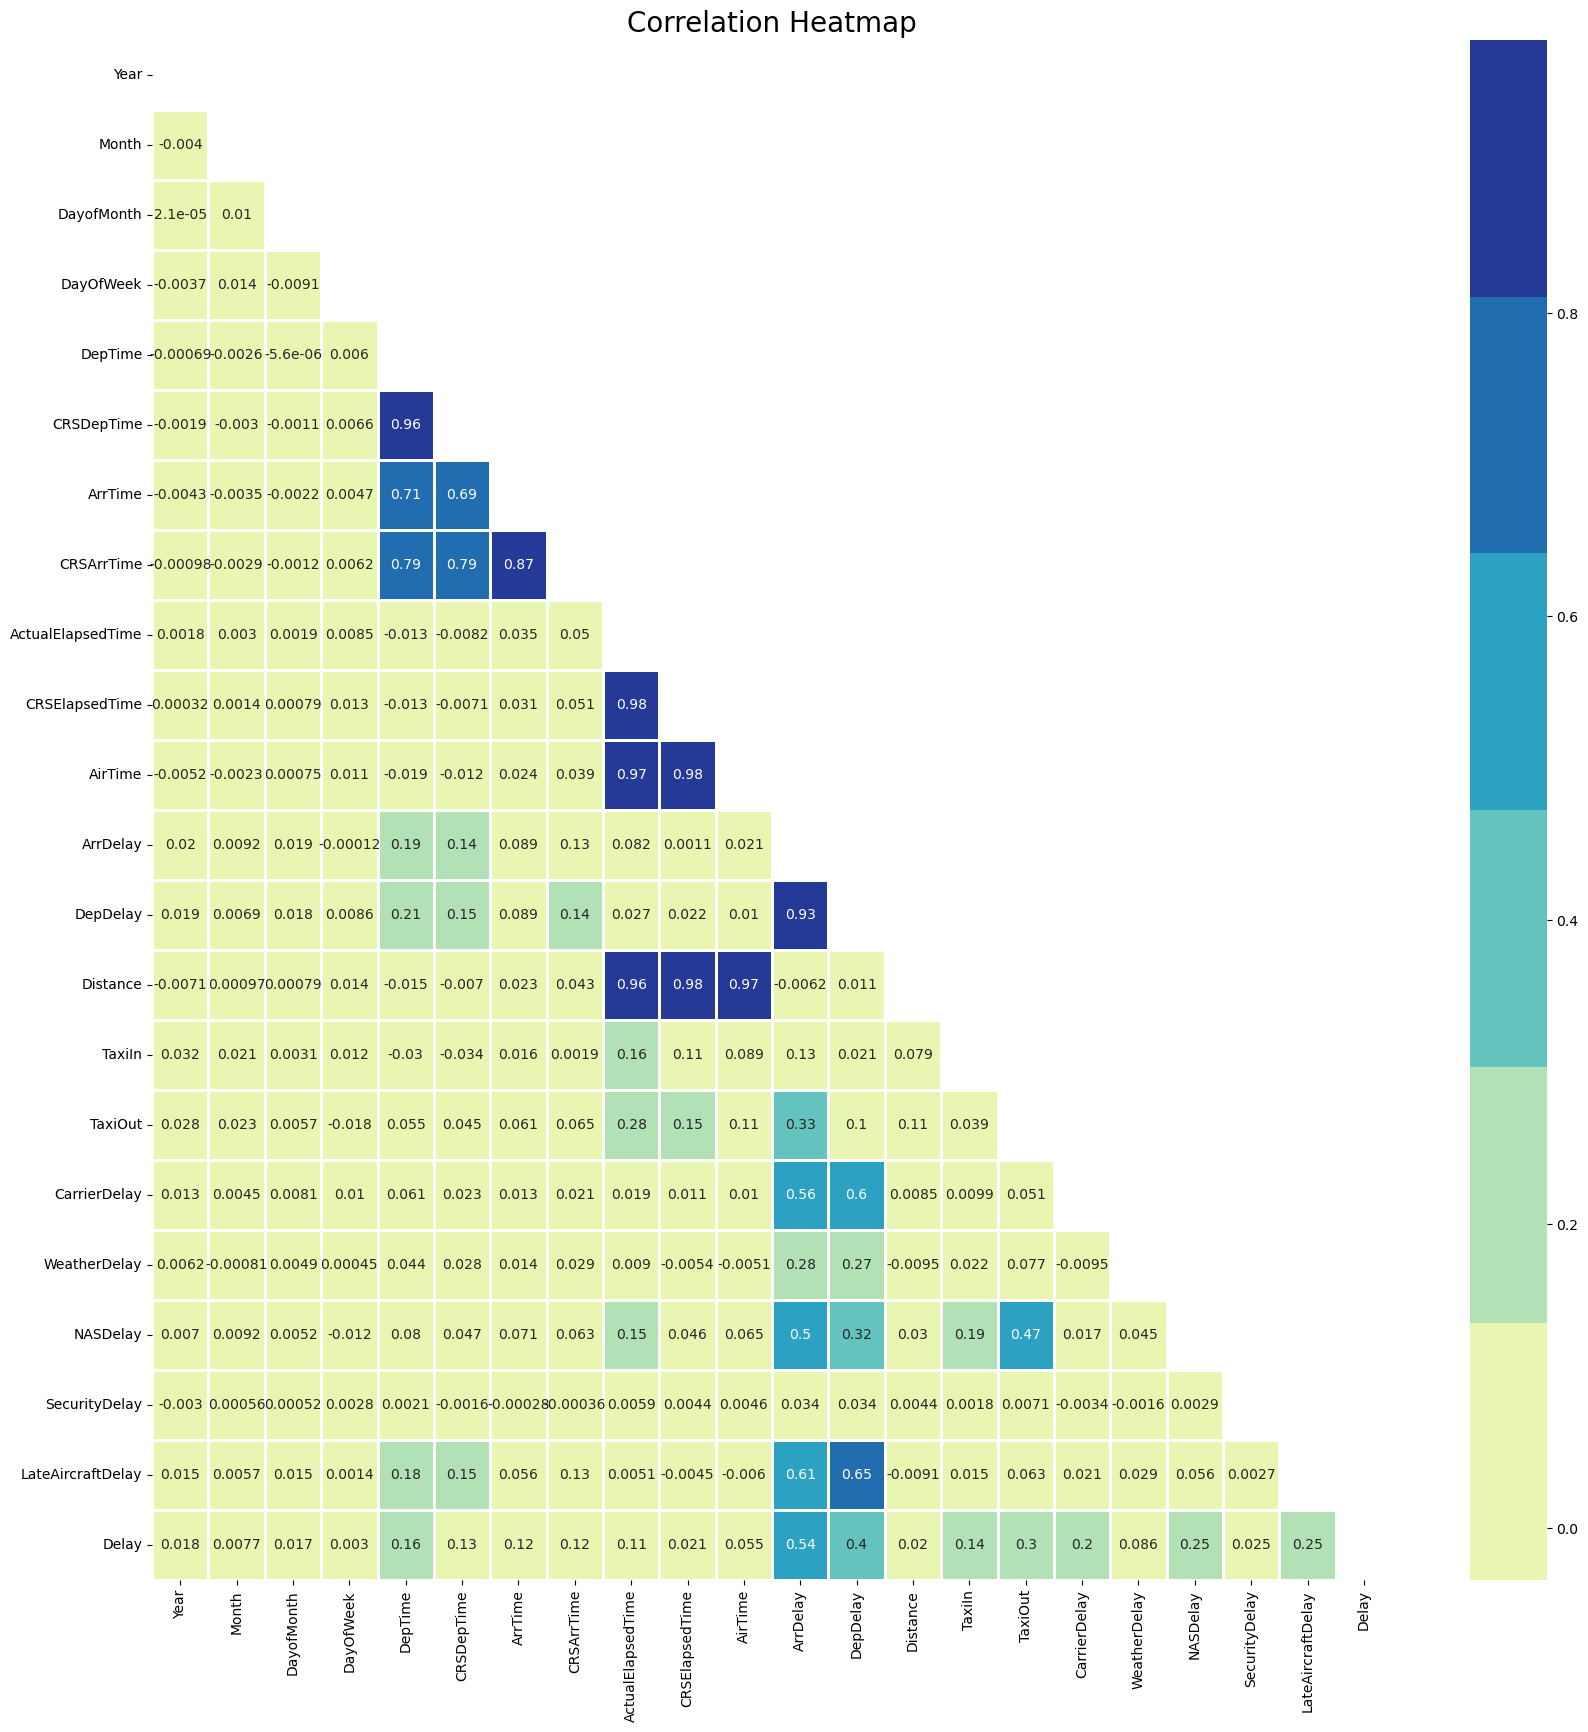

In [9]:
#correlation heatmap of all variables in df

plt.figure(figsize = (20,20))

mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True, cmap = cmap,
           mask = mask,linewidth=1)
plt.title('Correlation Heatmap', fontsize = 20)
plt.savefig('Correlation map.png')
plt.show()

In [10]:
#lets check the class balance
df['Delay'].value_counts()   

0    7626703
1    6642225
Name: Delay, dtype: int64

In [11]:
df.isna().sum()# looking for null values

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Delay                0
dtype: int64

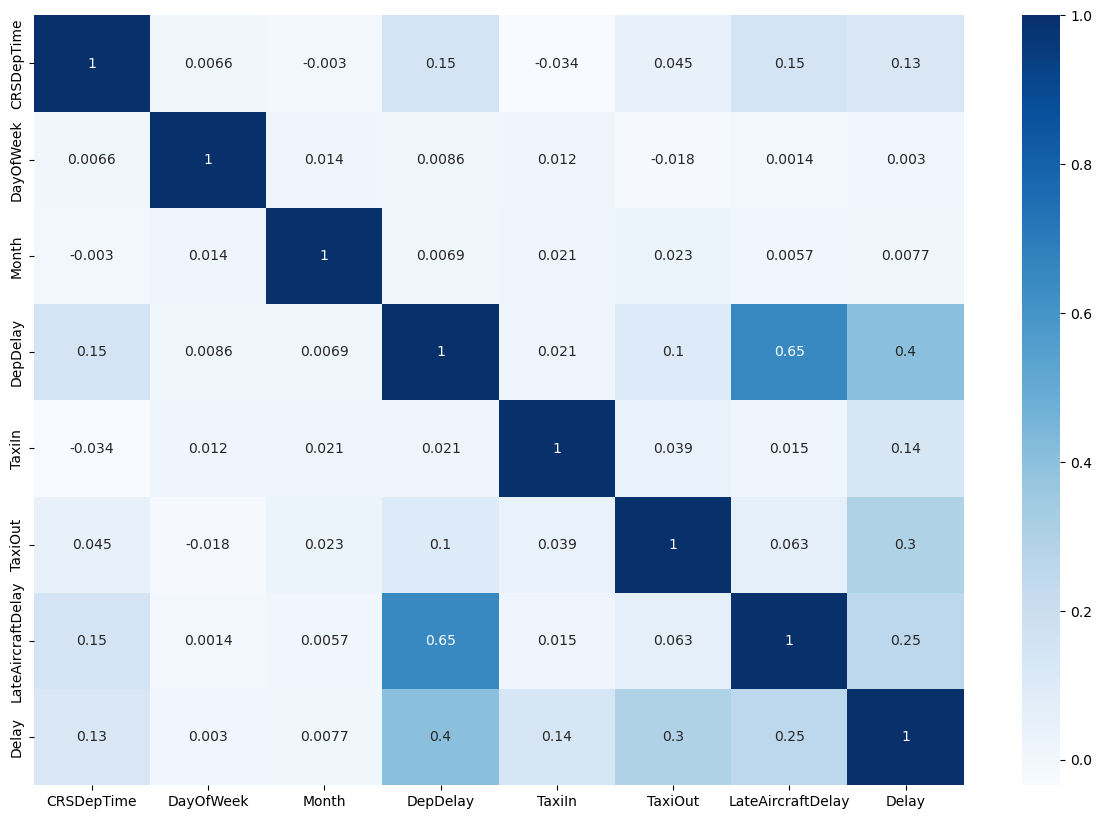

In [12]:
#plotting a correlation plot with just our feature variables and target variable
columns=['CRSDepTime','DayOfWeek','Month','DepDelay','TaxiIn','TaxiOut','LateAircraftDelay','Delay']
plt.figure(len(columns),figsize=(15,10))
correlation = df[columns].corr()
sns.heatmap(correlation,cmap='Blues',annot=True)
plt.savefig('Correlation Heatmap.png')

In [13]:
#Use the available variables to construct a model that predicts delays 

In [14]:
#split dataset into features and target variable
features=['CRSDepTime','DayOfWeek','Month','DepDelay','TaxiIn','TaxiOut','LateAircraftDelay']
X=df[features]
Y=df.Delay    #target variable

In [15]:
# splitting the data and scaling the data 
#splitting X and Y into training and testing datasets
X_traindata, X_testdata, Y_traindata, Y_testdata = train_test_split(X, Y, test_size=0.25, random_state=16)

In [16]:
#let us scale the dataset
#first scale on the X_train dataset
#
scaler=StandardScaler()
X_traindata=scaler.fit_transform(X_traindata)
X_testdata = scaler.transform(X_testdata)

In [17]:
#model developement and prediction
#let us instantiate the model 
logreg=LogisticRegression(random_state=16)

# fit the model with the data
logreg.fit(X_traindata,Y_traindata)

y_prediction=logreg.predict(X_testdata)

In [18]:
y_prediction  #explore

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [19]:
#model evaluation
#the confusion matrix helps us to identify True Positives (TP), True Negatives (TN), False positives (FP), and False negatives (FN) generated by a classification model
#The confusion matrix provides a summary of the model's performance by showing the number of correct and incorrect predictions, allowing us to evaluate of the model's strengths and weaknesses. 
confuse=metrics.confusion_matrix(Y_testdata,y_prediction)
confuse

array([[1717884,  188405],
       [ 420901, 1240042]], dtype=int64)

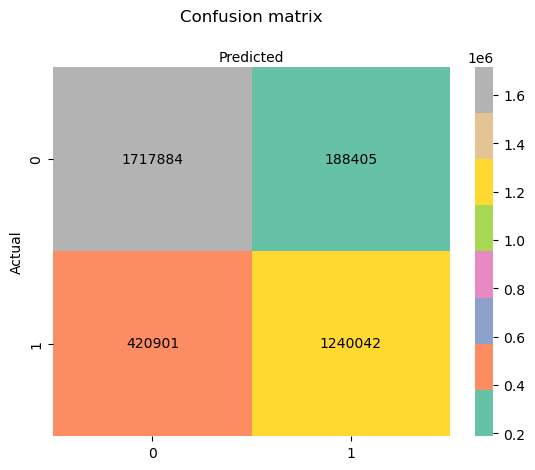

In [28]:
#lets plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(confuse), annot=True, cmap="Set2" ,fmt="d",annot_kws={"color": "black"})
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('Confusion matrix.png')


In [21]:
from sklearn.metrics import classification_report
target_names = ['No Delay','Delay']
print(classification_report(Y_testdata,y_prediction, target_names=target_names))

              precision    recall  f1-score   support

    No Delay       0.80      0.90      0.85   1906289
       Delay       0.87      0.75      0.80   1660943

    accuracy                           0.83   3567232
   macro avg       0.84      0.82      0.83   3567232
weighted avg       0.83      0.83      0.83   3567232



In [22]:
# the accuracy score of 83% tells us that the model was able to make predictions and get them right 83% of all predictions
# but remember there was class imbalance so accuracy may be biased as a performance metric

In [23]:
# Reciever Operating Characteristic Curve

In [24]:
#ROC is a probability curve and AUC (area under the curve) represents the degree or measure of separability. It tells us the models capability to distinguishing between classes.
#Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
# In our scenario  0 depicts 'No Delay' and 1 depicts 'Delay'

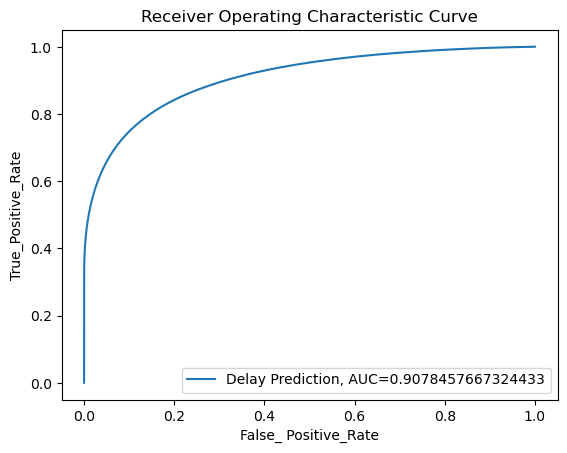

In [25]:
y_pred_proba = logreg.predict_proba(X_testdata)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_testdata,  y_pred_proba)
auc = metrics.roc_auc_score(Y_testdata, y_pred_proba)
plt.plot(fpr,tpr,label="Delay Prediction, AUC="+str(auc))
plt.ylabel("True_Positive_Rate")
plt.xlabel("False_ Positive_Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.savefig('Receiver Operating Characteristic Curve.png')
plt.legend()
plt.show()

In [27]:
#AUC of 0.9078 means that the model is able to rank the instances delay or no delay correctly with a high degree of accuracy.